### Задача 3: предсказать успеваемость студента по его данным (см. колонки G1, G2, G3).  Прототипирование можно делать в jupyter, итоговый результат надо   оформить в виде питоновского модуля  

### Models to test
    Models:
        naive
        OLS, http://www.statsmodels.org/dev/gettingstarted.html
        xgboost
        RandomForest

Судя по статье, ключевую роль в предсказании G3 играют G1, G2. Посмотрим на корреляции и распределения количественных признаков.

### Data preparation
Dalc (1-5) -> (1-3)


# Baseline
mean G1, G2

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection, linear_model, metrics
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, Lasso, Ridge, ElasticNet


from IPython.display import display
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# baseline
### mae, mse
### 0.94, 2.10 - por
### 1.30, 4.96 - mat

### baseline = ((X["G1"] + X["G2"])/2).values
### metrics.mean_squared_error(y, baseline)

In [6]:
def get_models():
    return [SGDRegressor(random_state=42), Lasso(random_state=42, alpha=0.001), 
            Ridge(random_state=42), ElasticNet(random_state=42, alpha=0.05, l1_ratio=0.6),
            RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42, criterion="mse"),
            GradientBoostingRegressor(random_state=42),
            ExtraTreesRegressor(random_state=42)]


def get_model_name(model):
    rep = model.__repr__()
    return rep[:rep.find("(")]


def get_pipeline_name(pipeline):
    return pipeline.steps[-1][0]


def make_pipelines():
    models = get_models()
    return list(map(
        lambda model: make_pipeline(
            PCA(n_components=10, svd_solver='full'),
            StandardScaler(), 
            model),
    models))    


def score_pipelines(pipelines, X, y):    
    scores = [(get_pipeline_name(pipe), 
               model_selection.cross_val_score(pipe, X, y, cv=10, scoring="neg_mean_squared_error").mean(), 
               model_selection.cross_val_score(pipe, X, y, cv=10, scoring="neg_mean_absolute_error").mean())
              for pipe in pipelines]
    
    return scores


def score_datasets():
    categorical = ["address", "famsize", "Pstatus", "schoolsup", "famsup", "paid",
          "activities", "nursery", "higher", "internet", "romantic",
              'school', 'sex', 'Mjob', 'Fjob', 'guardian', 'reason']
    target_col = ["G3"]
    drop_col = categorical
    result = {}
    
    postfix = ["mat", "por"]
    for post in postfix:
        df = pd.read_csv("../data/student-" + post + ".csv", ";")
        X, y = df.drop(target_col + drop_col, axis=1), df[target_col[0]]
        
        pipelines = make_pipelines()
        result[post] = score_pipelines(pipelines, X, y)
        
    return result    

In [389]:
models = get_models()
pipelines = list(map(
    lambda model: make_pipeline(
        PCA(n_components=10, svd_solver='full'),
        StandardScaler(), 
        model),
models))

In [394]:
pipelines[0].steps[-1][0]

'sgdregressor'

In [374]:
check_datasets()

{'mat': [('SGDRegressor', -1.2712343207872212e+20, -8888607811.9477882),
  ('Lasso', -3.7852021439916803, -1.2324880116957542),
  ('Ridge', -3.7851337157059093, -1.2327819593626386),
  ('ElasticNet', -3.7476357187516873, -1.2026265267669767),
  ('RandomForestRegressor', -2.9434288826170674, -1.028395962093918),
  ('GradientBoostingRegressor', -3.0031458324974412, -1.0723096989399123),
  ('ExtraTreesRegressor', -3.8101596153846153, -1.1702884615384614)],
 'por': [('SGDRegressor', -9.4052358776043848e+18, -2253739028.8389654),
  ('Lasso', -1.6967611986537836, -0.80866549245153652),
  ('Ridge', -1.6977269031941682, -0.80875692189327941),
  ('ElasticNet', -1.6682858149692688, -0.8003328011280193),
  ('RandomForestRegressor', -1.8168904377557211, -0.82768226633156738),
  ('GradientBoostingRegressor', -1.8783728614700497, -0.85326780875287833),
  ('ExtraTreesRegressor', -2.0472971153846151, -0.89416346153846171)]}

In [3]:
check_datasets()

{'mat': [('sgdregressor', -3.7787305977700085, -1.2766431151240827),
  ('lasso', -3.7013578078349361, -1.1987649400477198),
  ('ridge', -3.7017072969843503, -1.1972041669966225),
  ('elasticnet', -3.7054337659456933, -1.1851761325190562),
  ('randomforestregressor', -3.1771038253539201, -1.1317897459366804),
  ('gradientboostingregressor', -3.1408060499286123, -1.1034486656914624),
  ('extratreesregressor', -3.1669326923076921, -1.1740192307692308)],
 'por': [('sgdregressor', -1.6565014093229853, -0.79412343727864909),
  ('lasso', -1.6585861956102037, -0.79904210973780165),
  ('ridge', -1.6586899214047328, -0.79859990961731753),
  ('elasticnet', -1.6776488627854675, -0.79072038323196614),
  ('randomforestregressor', -2.3405868456222438, -0.95042535376888204),
  ('gradientboostingregressor', -2.1789907647205431, -0.90822762214595421),
  ('extratreesregressor', -2.5879853365384613, -0.98146394230769229)]}

In [7]:
score_datasets()

{'mat': [('sgdregressor', -3.7787305977700085, -1.2766431151240827),
  ('lasso', -3.7013578078349361, -1.1987649400477198),
  ('ridge', -3.7017072969843503, -1.1972041669966225),
  ('elasticnet', -3.7054337659456933, -1.1851761325190562),
  ('randomforestregressor', -3.1771038253539201, -1.1317897459366804),
  ('gradientboostingregressor', -3.1408060499286123, -1.1034486656914624),
  ('extratreesregressor', -3.1669326923076921, -1.1740192307692308)],
 'por': [('sgdregressor', -1.6565014093229853, -0.79412343727864909),
  ('lasso', -1.6585861956102037, -0.79904210973780165),
  ('ridge', -1.6586899214047328, -0.79859990961731753),
  ('elasticnet', -1.6776488627854675, -0.79072038323196614),
  ('randomforestregressor', -2.3405868456222438, -0.95042535376888204),
  ('gradientboostingregressor', -2.1789907647205431, -0.90822762214595421),
  ('extratreesregressor', -2.5879853365384613, -0.98146394230769229)]}

In [338]:
regressor = linear_model.Lasso(random_state = 42, alpha=0.001)
model_selection.cross_val_score(regressor, X, y, cv=None, scoring="neg_mean_squared_error").mean()

-1.8321578112124925

In [191]:
regressor = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 5,
                                                         random_state = 1, criterion="mae")
regressor.fit(X_train, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(X_test)))
print(regressor.feature_importances_)

0.645692307692
[ 0.00657833  0.00608839  0.0023452   0.00218573  0.00154813  0.00259603
  0.00610397  0.00341318  0.00584231  0.00528882  0.00499221  0.0027284
  0.01872755  0.02216162  0.90940014]


In [192]:
regressor = linear_model.Ridge(random_state = 42)
regressor.fit(X_train, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(X_test)))
print(regressor.coef_)

0.626674638511
[ 0.03054994 -0.03716485  0.03608955  0.09487327  0.10394244 -0.25150043
 -0.03314247 -0.0342148  -0.01180825 -0.09967844 -0.01171199 -0.04364371
  0.02754739  0.14611766  0.87721296]


In [193]:
regressor = linear_model.ElasticNet(random_state = 42, alpha=1, l1_ratio=0.5)
regressor.fit(X_train, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(X_test)))
print(regressor.coef_)

0.609279176367
[-0.          0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.20377811  0.75266261]


# With preprocessing

# PCA

In [157]:
from sklearn.decomposition import PCA
#Making PCA
scaler = PCA(n_components=8, svd_solver='full')
scaler.fit(X_train, y_train)
scaled_train_data = scaler.transform(X_train)
scaled_test_data = scaler.transform(X_test)

In [158]:
regressor = linear_model.SGDRegressor(random_state = 42)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)

0.641433954047
[-0.22677822 -0.74662659 -0.04699642  0.13133084  0.10545954  0.20710474
 -0.01156871  0.3972861 ]


In [159]:
regressor = linear_model.Lasso(random_state = 42, alpha=0.001)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)

0.624295340843
[-0.18087123 -0.73302579 -0.03900645  0.13054742  0.09508811  0.1927783
 -0.01429748  0.38818226]


In [160]:
regressor = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 5,
                                                         random_state = 1, criterion="mae")
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.feature_importances_)

0.847692307692
[ 0.1354445   0.78925892  0.01598603  0.00742995  0.00925944  0.0117788
  0.01291362  0.01792875]


In [161]:
regressor = linear_model.Ridge(random_state = 42)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)

0.624143978223
[-0.18090059 -0.73300822 -0.03935911  0.1309166   0.09553404  0.19323703
 -0.01500504  0.388492  ]


In [162]:
regressor = linear_model.ElasticNet(random_state = 42, alpha=1, l1_ratio=0.5)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)

0.715730078715
[-0.1563241  -0.67542311 -0.          0.          0.          0.         -0.
  0.        ]


# Standard scaling

In [194]:
#Making scaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)
scaled_train_data = scaler.transform(X_train)
scaled_test_data = scaler.transform(X_test)

In [195]:
regressor = linear_model.SGDRegressor(random_state = 42)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)
#Still, Worse than lasso. Though not statistically proven.

0.643363781971
[  1.00954816e-01  -1.86336951e-02   3.06326135e-02   8.48147883e-02
   7.77125006e-02  -1.53964174e-01   1.48146815e-03  -4.01598392e-02
  -3.42339611e-02  -1.01384832e-01  -1.67516032e-02  -9.01028959e-02
   1.29569410e-01   9.14685135e-01   2.01661222e+00]


In [196]:
regressor = linear_model.Lasso(random_state = 42, alpha=0.001)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)
#Worse than lasso without scaling

0.627067714804
[ 0.03597029 -0.03879028  0.03629804  0.07186759  0.0847739  -0.14615558
 -0.03150142 -0.03612008 -0.01335748 -0.09409601 -0.01467191 -0.06252046
  0.13017143  0.39625116  2.55283707]


In [197]:
regressor = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 5,
                                                         random_state = 1, criterion="mae")
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.feature_importances_)

0.645692307692
[ 0.00657833  0.00608839  0.0023452   0.00218573  0.00154813  0.00259603
  0.00610397  0.00341318  0.00584231  0.00528882  0.00499221  0.0027284
  0.01872755  0.02216162  0.90940014]


In [198]:
regressor = linear_model.Ridge(random_state = 42)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)

0.626241073019
[ 0.03848763 -0.04097977  0.03948573  0.07267151  0.08547213 -0.1484646
 -0.03153382 -0.036732   -0.01418137 -0.09485151 -0.01537876 -0.0638182
  0.13101576  0.407806    2.53844172]


In [199]:
regressor = linear_model.ElasticNet(random_state = 42, alpha=1, l1_ratio=0.5)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)

1.00220155606
[-0.          0.          0.         -0.          0.         -0.01573826
  0.         -0.         -0.         -0.         -0.         -0.         -0.
  0.73132688  1.22255771]


# PCA -> Std Scaling

In [169]:
#Making scaler
pipe = make_pipeline(PCA(n_components=10, svd_solver='full'), StandardScaler())

scaler = pipe
scaler.fit(X_train, y_train)
scaled_train_data = scaler.transform(X_train)
scaled_test_data = scaler.transform(X_test)

In [170]:
regressor = linear_model.SGDRegressor(random_state = 42)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)
#Still, Worse than lasso. Though not statistically proven.

0.612504520637
[-0.87932312 -2.77488872 -0.06152026  0.18461183  0.13063205  0.24600996
 -0.02207972  0.39883144  0.13799775 -0.11899727]


In [171]:
regressor = linear_model.Lasso(random_state = 42, alpha=0.001)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)
#Worse than lasso without scaling

0.61721240859
[-0.87624334 -2.79300113 -0.06304659  0.18893855  0.12995797  0.23265238
 -0.01662964  0.40352436  0.131182   -0.11931039]


In [172]:
regressor = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 5,
                                                         random_state = 1, criterion="mae")
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.feature_importances_)
#Worse than lasso without scaling

0.823615384615
[ 0.12981162  0.78479895  0.01558314  0.00741277  0.00555149  0.01078593
  0.00686144  0.01431525  0.00691334  0.01796606]


In [181]:
regressor = linear_model.Ridge(random_state = 42, alpha=1)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)

0.616613638142
[-0.87574378 -2.78922506 -0.06393711  0.18961387  0.13073411  0.23325297
 -0.01759951  0.40383286  0.13195605 -0.12010474]


In [174]:
regressor = linear_model.ElasticNet(random_state = 42, alpha=1,l1_ratio=0.5)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)

1.30595682494
[-0.25149556 -1.52933409 -0.          0.          0.          0.         -0.
  0.          0.         -0.        ]


# PCA -> Std Scalingwith binary features

In [286]:
class PreProcBinary(BaseEstimator, TransformerMixin):
    """Custom Pre-Processing estimator for our use-case
    """

    def __init__(self):
        pass

    def transform(self, df):
        """Regular transform() that is a help for training, validation & testing datasets
           (NOTE: The operations performed here are the ones that we did prior to this cell)
        """
        binary_array = process_binary(df).as_matrix()
        
        numerical_array = process_numerical(df).as_matrix()
        numerical_array = self.numerical_pipe_.transform(numerical_array)
        
        #return numerical_array
        return np.hstack((numerical_array, binary_array))

    def fit(self, df, y=None, **fit_params):
        """Fitting the Training dataset & calculating the required values from train
           e.g: We will need the mean of X_train['Loan_Amount_Term'] that will be used in
                transformation of X_test
        """
        numerical = ["age", 'Medu', "Fedu", "traveltime", "studytime", "failures", 
               "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences", "G1", "G2"]
        
        numerical_pipe = make_pipeline(PCA(n_components=10, svd_solver='full'), StandardScaler())
        #numerical_pipe = make_pipeline(StandardScaler())
        self.numerical_pipe_ = numerical_pipe.fit(df[numerical], y)
        
        return self
    
def process_numerical(df):
    numerical = ["age", 'Medu', "Fedu", "traveltime", "studytime", "failures", 
               "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences", "G1", "G2"]
    
    #cutting off rare values
    df.loc[df["age"] > 19, 'age'] = 19
    df.loc[(df["Dalc"] > 3).index, 'Dalc'] = 3
    #We are still gettig warn of chained assignment here, though IT IS false positive

    return df[numerical]
    
        
def process_binary(df):
    categorical = ["address", "famsize", "Pstatus", "schoolsup", "famsup", "paid",
              "activities", "nursery", "higher", "internet", "romantic",
                  'school', 'sex', 'Mjob', 'Fjob', 'guardian', 'reason']
    binary = list(filter(lambda col: df[col].value_counts().shape[0] == 2, categorical))

    # encoding binary variables
    schoolsup_values =  {'no': 0, 'yes': 1}
    famsup_values =  {'no': 0, 'yes': 1}
    paid_values =  {'no': 0, 'yes': 1}
    activities_values =  {'no': 0, 'yes': 1}
    nursery_values =  {'no': 0, 'yes': 1}
    higher_values =  {'no': 0, 'yes': 1}
    internet_values =  {'no': 0, 'yes': 1}
    romantic_values =  {'no': 0, 'yes': 1}

    sex_values =  {'F': 0, 'M': 1} #male\female
    address_values =  {'U': 0, 'R': 1} #urban\rural
    famsize_values =  {'GT3': 1, 'LE3': 0} #le3 == (<= 3)
    Pstatus_values =  {'T': 0, 'A': 1} #together\apart
    school_values =  {'GP': 0, 'MS': 1} #school name
    
    # cutting off categorical features with 3+ values
    tmp = df[binary].replace({'address' : address_values, 'famsize' : famsize_values, 'Pstatus' : Pstatus_values,
                'schoolsup' : schoolsup_values, 'famsup' : famsup_values, 'paid' : paid_values, 
                'activities' : activities_values, 'nursery' : nursery_values, 'higher' : higher_values,
                'internet' : internet_values, 'romantic' : romantic_values, 'school' : school_values,
                'sex' : sex_values})
    # features from discovery notebook
    #return tmp
    return tmp[["address", "schoolsup", "higher", "internet", "romantic"]]

In [287]:
target_col = ["G3"]
drop_col = []

X, y = df.drop(target_col + drop_col, axis=1), df[target_col[0]]
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.1, random_state=42)

#custom pipline
pipe = make_pipeline(PreProcBinary())
scaler = pipe
scaler.fit(X_train, y_train)
scaled_train_data = scaler.transform(X_train)
scaled_test_data = scaler.transform(X_test)

regressor = linear_model.ElasticNet(random_state = 42, alpha=0.05, l1_ratio=0.6, )
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)

0.617761791004
[-0.83636869 -2.70824374 -0.02982966  0.16491794  0.10449172  0.20953352
 -0.          0.36582141  0.09583518 -0.06371758 -0.0416098  -0.
  0.01196204  0.         -0.        ]


/home/swm/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [267]:
scaled_test_data.shape

(65, 15)

In [268]:
regressor = linear_model.SGDRegressor(random_state = 42)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)
#Still, Worse than lasso. Though not statistically proven.

1.23464658464
[-0.63321602 -2.29950217  0.25068252  0.49171508  0.41285495  0.29074612
  0.33246283  0.48946694  0.21542213  0.25430132  0.67076141  0.42493685
  3.85143799  2.17753399  0.79865303]


In [269]:
regressor = linear_model.Lasso(random_state = 42, alpha=0.001)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)
#Worse than lasso without scaling

0.633681633052
[-0.87995248 -2.746511   -0.10144367  0.19840872  0.16015307  0.24382721
 -0.02845265  0.39922425  0.13930242 -0.11591664 -0.16131686 -0.15745582
  0.30099903  0.12779479 -0.00980081]


In [281]:
from sklearn.linear_model import ElasticNet

In [280]:
regressor = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 5,
                                                         random_state = 1, criterion="mse", max_leaf_nodes=80, 
                                          min_impurity_split=0.5)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.feature_importances_)
#Worse than lasso without scaling

0.794847302758
[  8.26123427e-02   8.15984520e-01   1.92217767e-02   5.34344275e-03
   5.56652168e-03   7.01236317e-03   5.59427515e-03   2.37435449e-02
   6.52858320e-03   2.51488973e-02   5.05763206e-04   8.72302542e-04
   3.85763263e-04   3.80515511e-04   1.09938791e-03]


In [243]:
regressor = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 10,
                                                         random_state = 1, criterion="mse")
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.feature_importances_)
#Worse than lasso without scaling

0.700047173532
[ 0.00954216  0.0073531   0.00500435  0.00639035  0.005927    0.00708236
  0.0124112   0.0121555   0.00803359  0.00918767  0.00592883  0.00646863
  0.0481426   0.02074754  0.8264852   0.00189863  0.00226784  0.00171293
  0.0010725   0.00218802]


In [244]:
regressor = linear_model.Ridge(random_state = 42, alpha=1)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)

0.650963301375
[ 0.05616898 -0.0757874   0.04686815  0.1080861   0.07754689 -0.14188896
 -0.03567371 -0.0317531  -0.02373152 -0.0838453  -0.031094   -0.06453468
  0.11609019  0.37798928  2.52868489 -0.233227   -0.16637042  0.24970869
  0.14905864 -0.00983162]


In [288]:
regressor = linear_model.ElasticNet(random_state = 42, alpha=1,l1_ratio=0.5)
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)

1.30494018331
[-0.25219255 -1.52843537  0.          0.          0.          0.          0.
  0.          0.          0.         -0.         -0.          0.          0.
 -0.        ]


In [289]:
regressor = linear_model.ElasticNet(random_state = 42, alpha=0.05, l1_ratio=0.6, )
regressor.fit(scaled_train_data, y_train)
print(metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)))
print(regressor.coef_)

0.617761791004
[-0.83636869 -2.70824374 -0.02982966  0.16491794  0.10449172  0.20953352
 -0.          0.36582141  0.09583518 -0.06371758 -0.0416098  -0.
  0.01196204  0.         -0.        ]


In [292]:
md = regressor

test_df = pd.read_csv("../data/student-mat.csv", ";")
target_col = "G3"
x, y = test_df.drop(target_col, axis=1), test_df[target_col]

scaled_test_data = scaler.transform(x)

np.abs(md.predict(scaled_test_data) - y).mean()

1.1726180304475047

In [ ]:
np.abs(md.predict(x) - y).mean()

In [220]:
from sklearn import ensemble
from sklearn.model_selection import learning_curve

In [36]:
rf_classifier_low_depth = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 5,
                                                         random_state = 1, criterion="mae")

In [40]:
rf_classifier_low_depth.feature_importances_

array([ 0.00657833,  0.00608839,  0.0023452 ,  0.00218573,  0.00154813,
        0.00259603,  0.00610397,  0.00341318,  0.00584231,  0.00528882,
        0.00499221,  0.0027284 ,  0.01872755,  0.02216162,  0.90940014])

In [39]:
rf_classifier_low_depth.fit(X_train, y_train)
metrics.mean_absolute_error(y_test, rf_classifier_low_depth.predict(X_test))

0.64569230769230768

In [303]:
#Making scaler
pipe = make_pipeline(PCA(n_components=10, svd_solver='full'), StandardScaler())

scaler = pipe
scaler.fit(X_train, y_train)
scaled_train_data = scaler.transform(X_train)
scaled_test_data = scaler.transform(X_test)

rf_classifier_low_depth.fit(scaled_train_data, y_train)
metrics.mean_absolute_error(y_test, rf_classifier_low_depth.predict(scaled_test_data))

0.84953846153846158

[ 43 129 216 302 388]
[ 0.86992614  0.82225123  0.76377071  0.78560228  0.75776648]
[ 0.6610185   0.64833092  0.67851789  0.69423349  0.68566686]


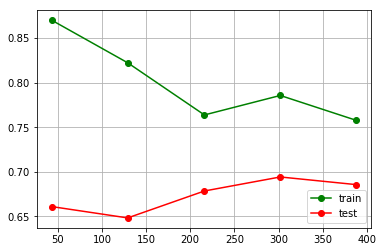

In [64]:
rf_classifier_low_depth = ensemble.RandomForestRegressor(n_estimators = 50, max_depth = 2,
                                                         random_state = 1, criterion="mae")
train_sizes, train_scores, test_scores = learning_curve(rf_classifier_low_depth, X, y,
                                                        train_sizes=np.arange(0.1, 1., 0.2), cv=3)

print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
#pylab.ylim((0.0, 2.0))
pylab.legend(loc='lower right')

In [66]:
#Scaling is not viable for RF model
rf_classifier_low_depth.fit(scaled_train_data, y_train)
metrics.mean_absolute_error(y_test, rf_classifier_low_depth.predict(scaled_test_data))

0.98369230769230775

[ 43 129 216 302 388]
[ 0.87348913  0.83655558  0.78759007  0.79688056  0.80347542]
[ 0.66976177  0.65495653  0.70467052  0.70990262  0.70254845]


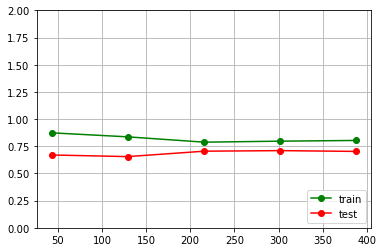

In [29]:
X_scaled = scaler.transform(X)

rf_classifier_low_depth = ensemble.RandomForestRegressor(n_estimators = 50, max_depth = 2, random_state = 1)
train_sizes, train_scores, test_scores = learning_curve(rf_classifier_low_depth,
                                                                       X_scaled, y, 
                                                                       train_sizes=np.arange(0.1, 1., 0.2), 
                                                                       cv=3)

print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 2.0))
pylab.legend(loc='lower right')

# OLS, http://www.statsmodels.org/dev/gettingstarted.html

In [92]:
import statsmodels
import scipy as sc
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

/home/swm/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [93]:
numeric

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

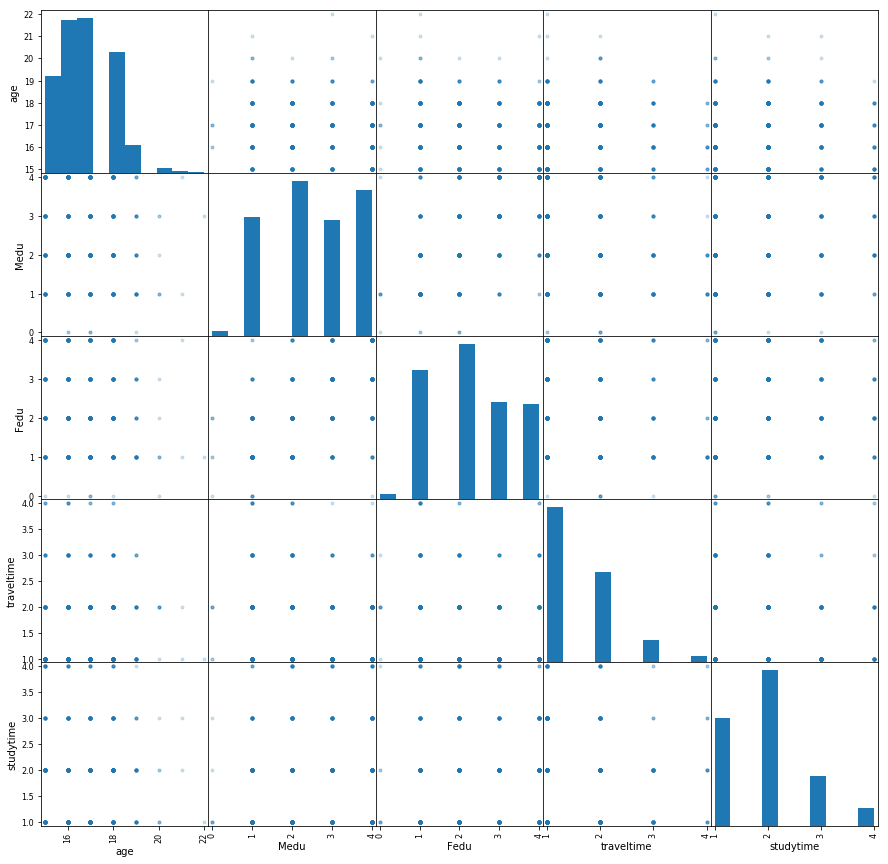

In [132]:
pd.tools.plotting.scatter_matrix(df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime',]], alpha=0.2, 
                                 figsize=(15, 15), diagonal='hist')
pylab.show()

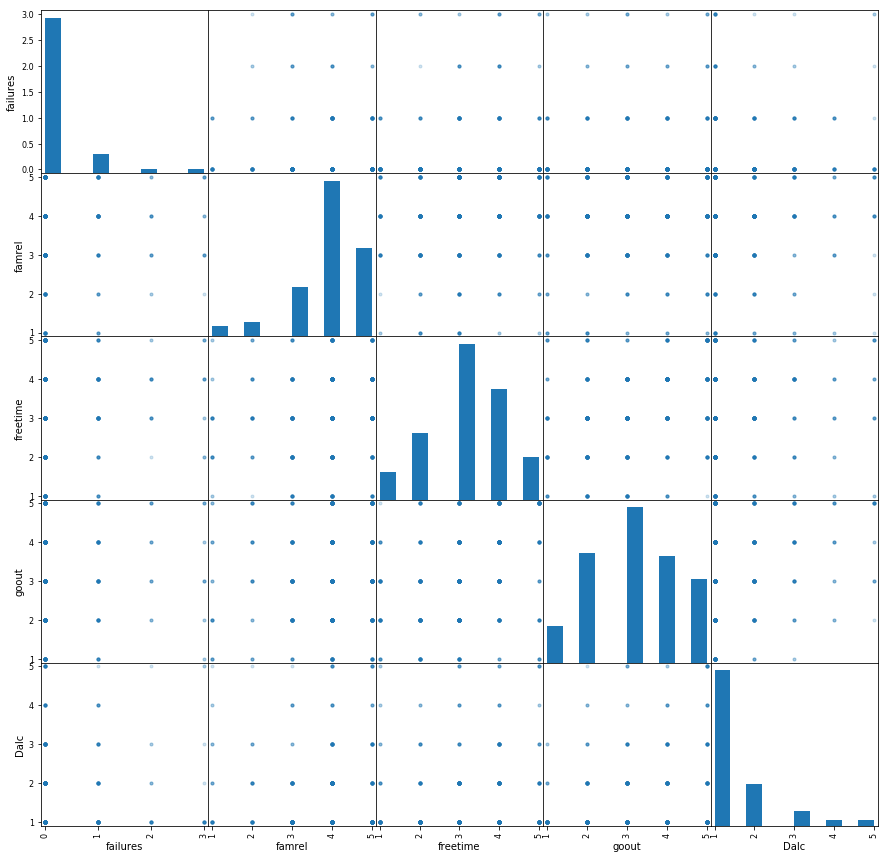

In [133]:
pd.tools.plotting.scatter_matrix(df[['failures', 'famrel', 'freetime', 'goout', 'Dalc',]], alpha=0.2, 
                                 figsize=(15, 15), diagonal='hist')
pylab.show()

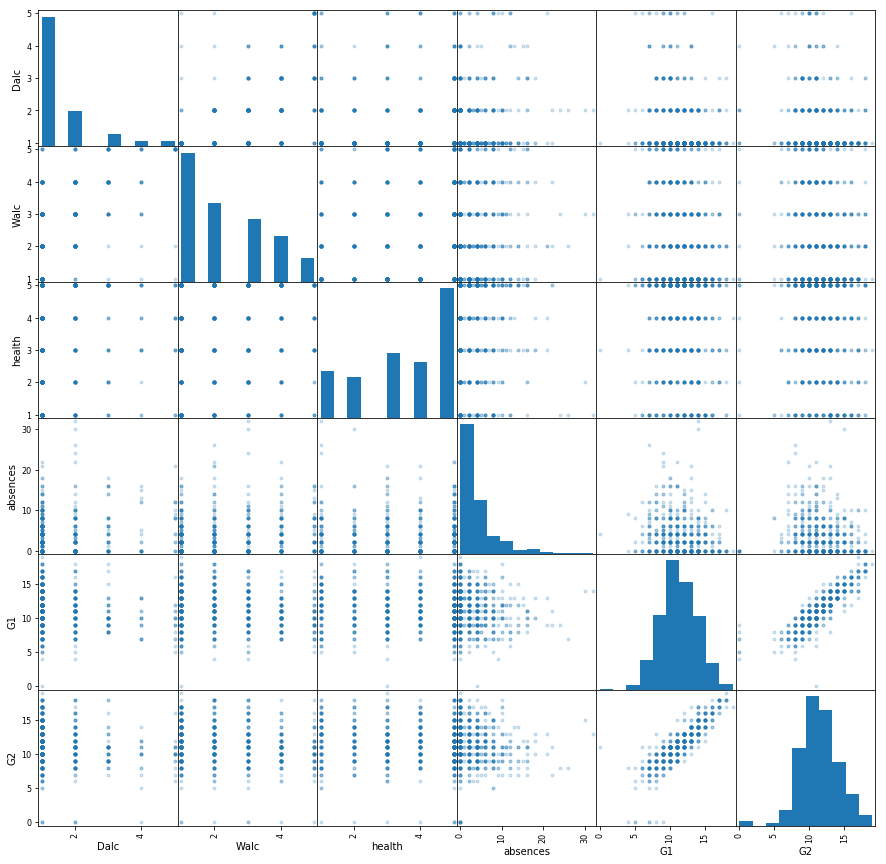

In [134]:
pd.tools.plotting.scatter_matrix(df[['Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']], alpha=0.2, 
                                 figsize=(15, 15), diagonal='hist')
pylab.show()

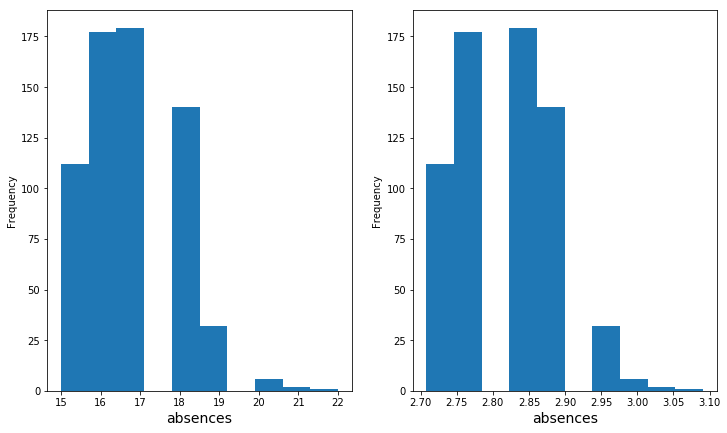

In [146]:
plt.figure(figsize(12,7))

plt.subplot(121)
df['age'].plot.hist()
plt.xlabel('absences', fontsize=14)

plt.subplot(122)
np.log(df['age']).plot.hist()
plt.xlabel('absences', fontsize=14)

pylab.show()

In [94]:
m1 = smf.ols('G3 ~ age + Medu + Fedu + traveltime + studytime + '\
             'failures + famrel + freetime + goout + Dalc + Walc + health + absences + G1 + G2',
             data=df)
fitted = m1.fit()             
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     325.5
Date:                Thu, 11 Jan 2018   Prob (F-statistic):          1.76e-281
Time:                        14:30:12   Log-Likelihood:                -833.92
No. Observations:                 634   AIC:                             1700.
Df Residuals:                     618   BIC:                             1771.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7582      0.619     -1.225      0.2

In [95]:
np.abs(fitted.predict() - y).mean()

0.6451105432317704

In [148]:
n = X.shape[0]
((fitted.predict() - y) ** 2).sum() / n

1.5323614624500934

C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in log


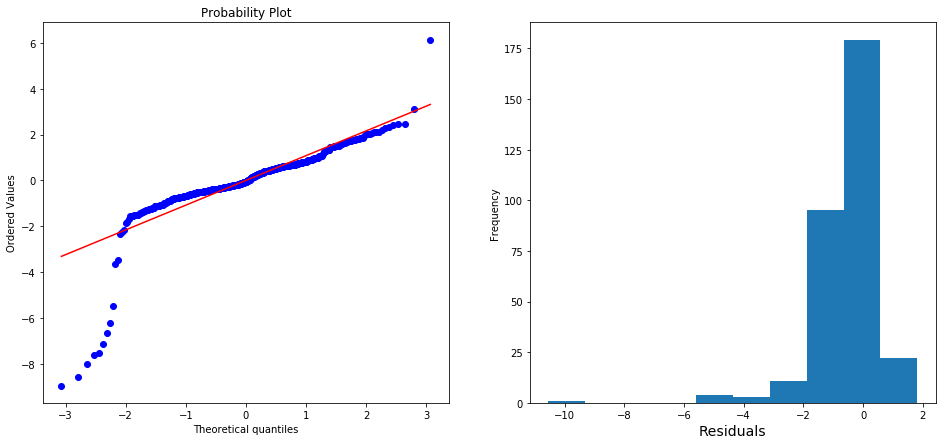

In [149]:
plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

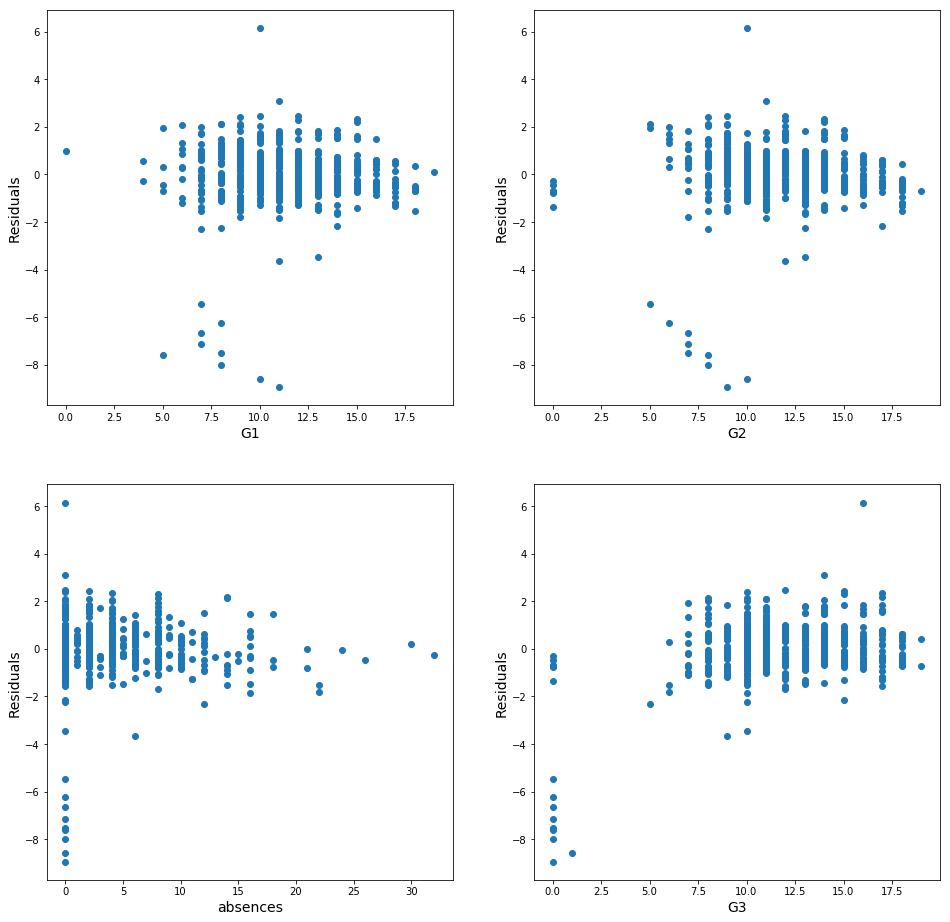

In [155]:
plt.figure(figsize(16,16))

plt.subplot(221)
scatter(df['G1'],fitted.resid)
plt.xlabel('G1', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.subplot(222)
scatter(df['G2'],fitted.resid)
plt.xlabel('G2', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.subplot(223)
scatter(df['absences'],fitted.resid)
plt.xlabel('absences', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.subplot(224)
scatter(df['G3'],fitted.resid)
plt.xlabel('G3', fontsize=14)
plt.ylabel('Residuals', fontsize=14)


pylab.show()